In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets


In [ ]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#LABEL ENCODER
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df = pd.DataFrame(X, columns=feature_names)

In [ ]:
df["target"] = y

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


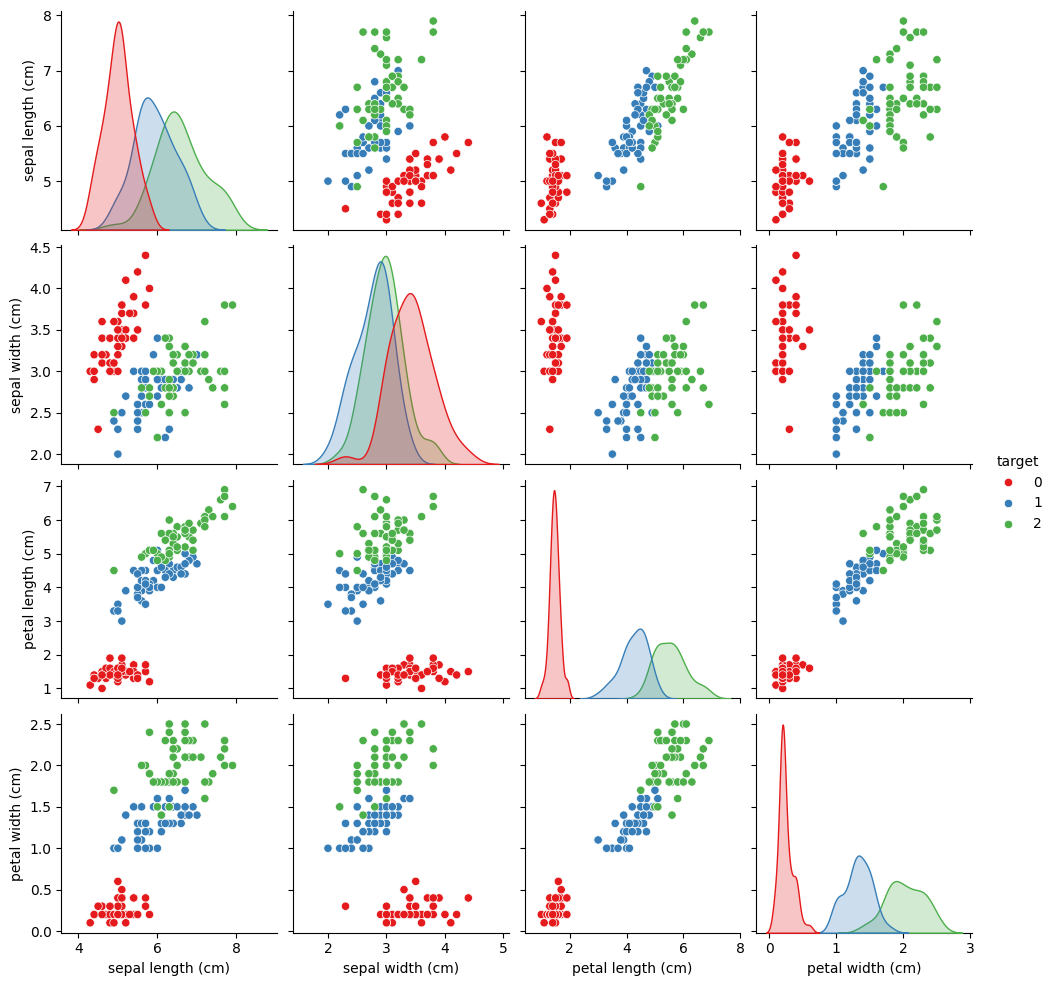

In [ ]:
sns.pairplot(df, hue="target", palette="Set1")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt_model.predict(X_test)

In [ ]:
y_pred_dt

array([2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       1])

In [ ]:
y_test

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1])

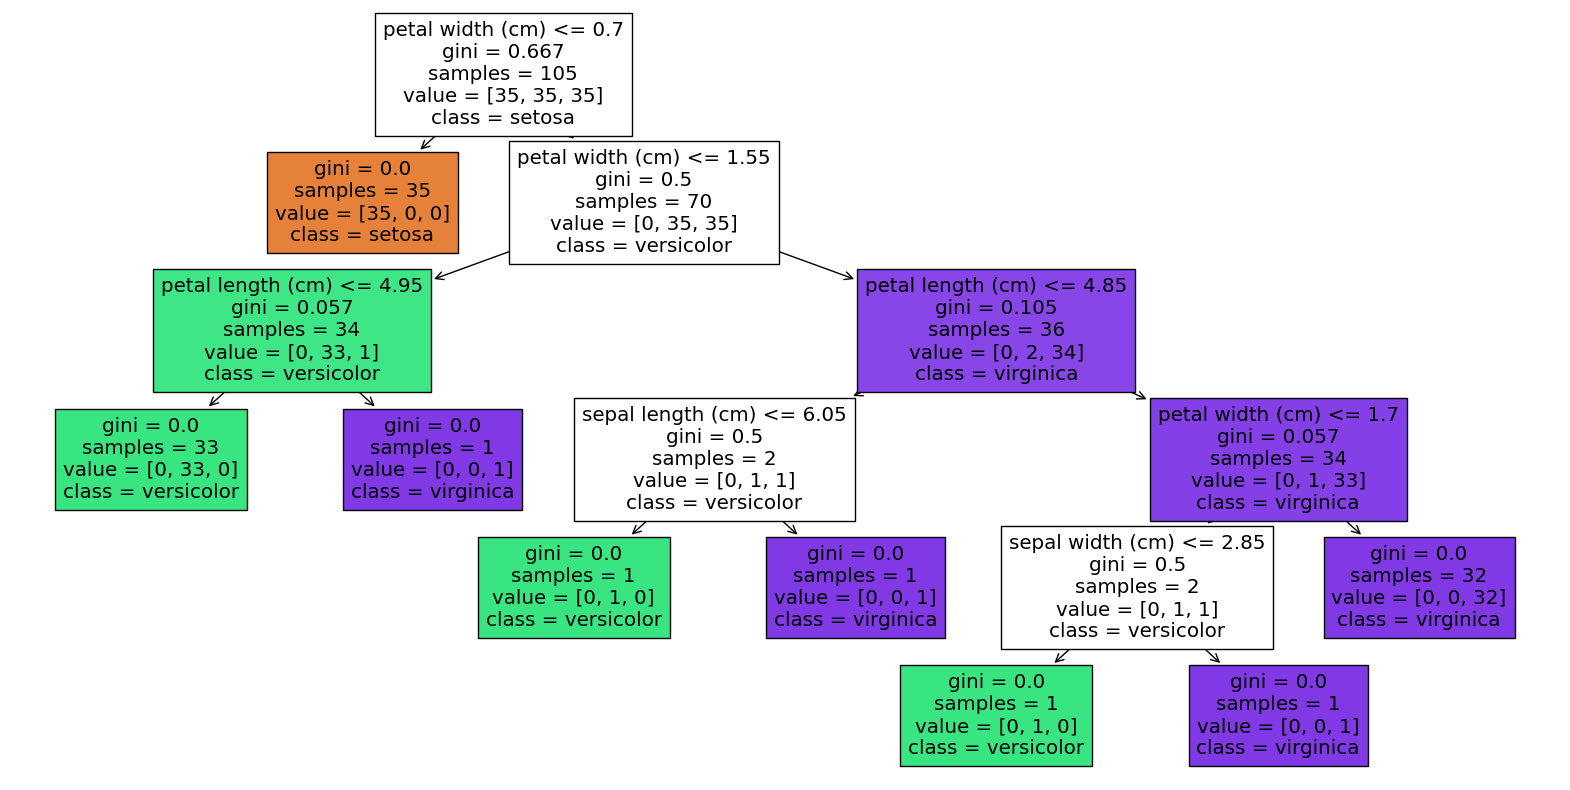

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=feature_names, class_names=target_names)
plt.show()

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Accuracy: 0.9111111111111111


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_dt))

Confusion Matrix:
 [[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]
